Dataset Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

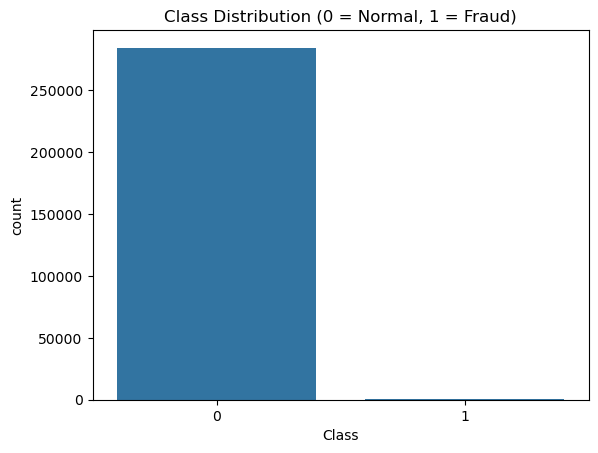


Train Class Distribution:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE Class Distribution:
Class
0    227451
1    227451
Name: count, dtype: int64

--- Logistic Regression Results ---
ROC-AUC: 0.9698482164390798
Confusion Matrix:
 [[55406  1458]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


--- Random Forest Results ---
ROC-AUC: 0.9731024901519414
Confusion Matrix:
 [[56849    15]
 [   16    82]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro av

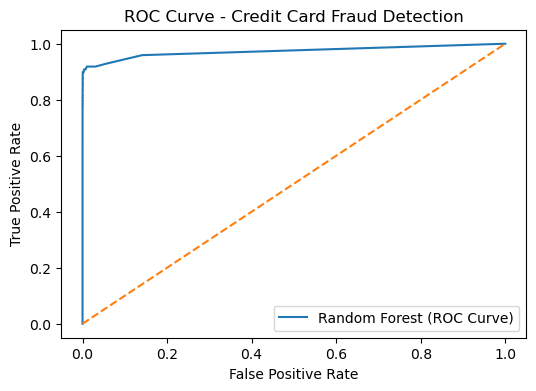


--- Isolation Forest Results ---
Confusion Matrix:
 [[56825    39]
 [   73    25]]

✅ PROJECT COMPLETED SUCCESSFULLY


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("creditcard.csv")
print("Dataset Shape:", df.shape)
print(df.head())
print("\nClass Distribution:")
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
print("\nTrain Class Distribution:")
print(y_train.value_counts())
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE Class Distribution:")
print(y_train_smote.value_counts())
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]
print("\n--- Logistic Regression Results ---")
print("ROC-AUC:", roc_auc_score(y_test, lr_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_smote, y_train_smote)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]
print("\n--- Random Forest Results ---")
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
fpr, tpr, _ = roc_curve(y_test, rf_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="Random Forest (ROC Curve)")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Card Fraud Detection")
plt.legend()
plt.show()
iso = IsolationForest(contamination=0.001, random_state=42)
iso.fit(X_train)
iso_pred = iso.predict(X_test)
iso_pred = np.where(iso_pred == -1, 1, 0)
print("\n--- Isolation Forest Results ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, iso_pred))
print("\n✅ PROJECT COMPLETED SUCCESSFULLY")
